In [1]:
%pip install matplotlib pandas numpy seaborn wordcloud

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\khanh\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import ast
from wordcloud import WordCloud
from pathlib import Path
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [3]:
raw_df = pd.read_csv('Data/HondaVietnam_cleaned.csv')

### PHÂN TÍCH VỀ THỜI GIAN ĐĂNG BÀI

Đồ thị thời gian đăng bài trong ngày

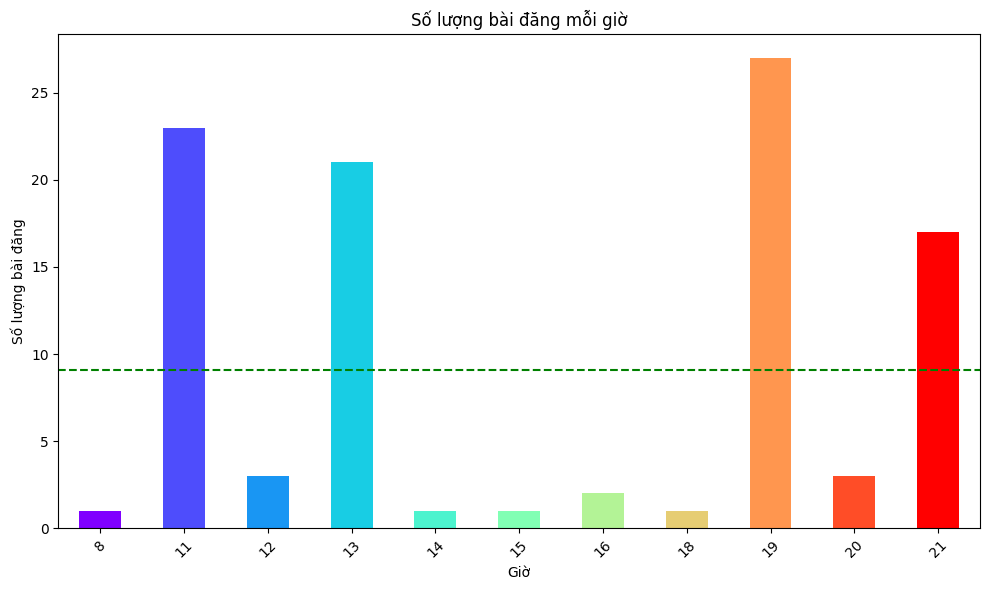

In [4]:
raw_df['time'] = pd.to_datetime(raw_df['time'])
raw_df['hour'] = raw_df['time'].dt.hour

hour_post_counts = raw_df['hour'].value_counts().sort_index()
average_posts_per_hour = raw_df['hour'].value_counts().mean()

num_days = len(hour_post_counts)
rainbow_colors = plt.cm.rainbow(np.linspace(0, 1, num_days))

plt.figure(figsize=(10, 6))
hour_post_counts.plot(kind='bar', color=rainbow_colors)
plt.axhline(y=average_posts_per_hour, color='g', linestyle='--', label='Số bài đăng trung bình')
plt.title('Số lượng bài đăng mỗi giờ')
plt.xlabel('Giờ')
plt.ylabel('Số lượng bài đăng')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Trung bình số lượng bài đăng mỗi ngày

In [5]:
raw_df['date'] = raw_df['time'].dt.date
average_posts_per_day = raw_df['date'].value_counts().mean()

print(f'Trung bình số lượng bài đăng mỗi ngày: {average_posts_per_day:.2f}')

Trung bình số lượng bài đăng mỗi ngày: 3.12


Số bài đăng của các ngày trong tuần

Text(0, 0.5, 'Posts')

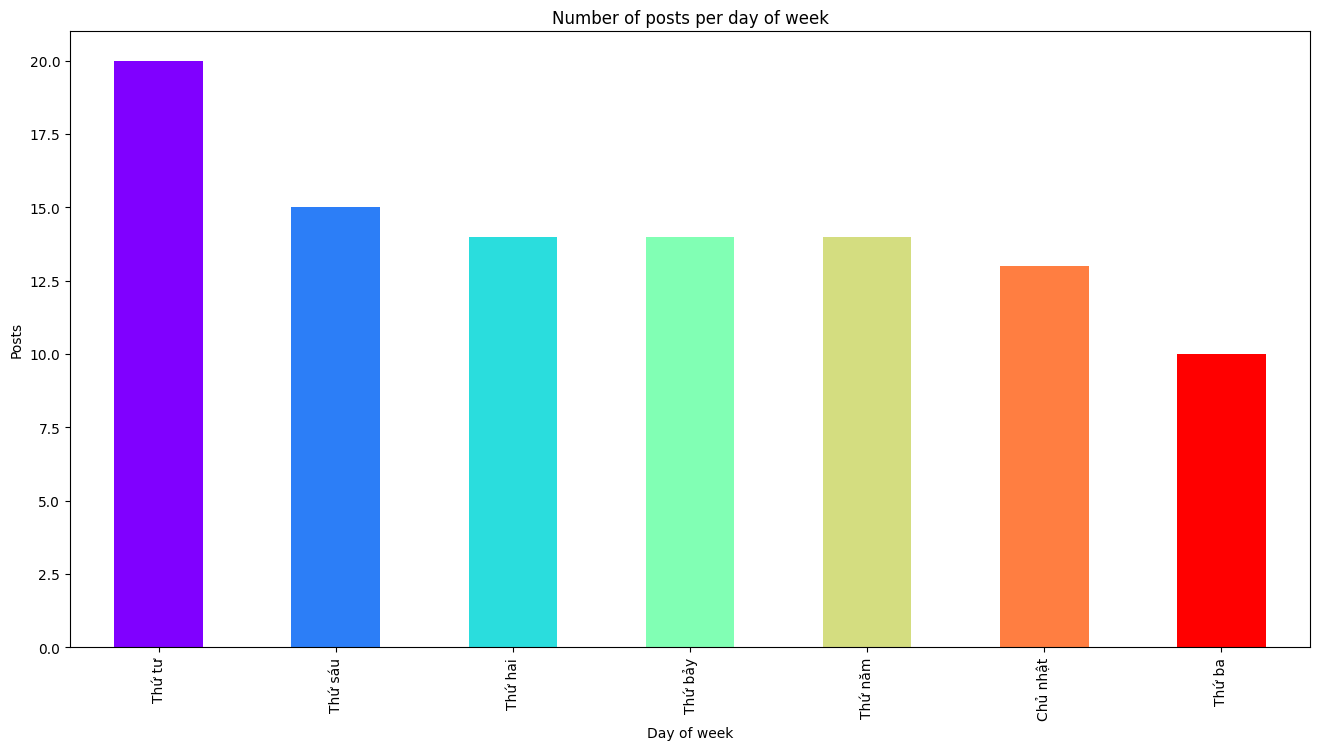

In [6]:
week_day = ['Thứ hai', 'Thứ ba', 'Thứ tư', 'Thứ năm', 'Thứ sáu', 'Thứ bảy', 'Chủ nhật']
raw_df['week_day'] = raw_df['time'].apply(lambda x: week_day[x.weekday()])

colors = cm.rainbow(np.linspace(0, 1, len(raw_df['week_day'].unique())))
raw_df['week_day'].value_counts().plot(kind='bar', figsize=(16,8), color=colors)
plt.title('Number of posts per day of week')
plt.xlabel('Day of week')
plt.ylabel('Posts')

Số lượng bài đăng các ngày trong tháng của HonDa Việt Nam

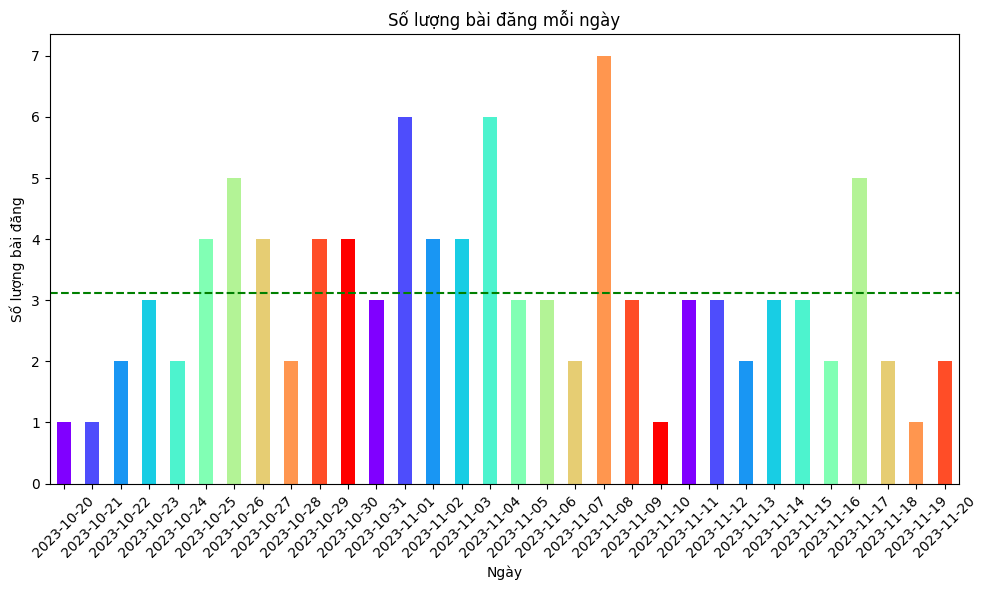

In [7]:
daily_post_counts = raw_df['date'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
daily_post_counts.plot(kind='bar', color= rainbow_colors)
plt.axhline(y=average_posts_per_day, color='g', linestyle='--', label='Số bài đăng trung bình')
plt.title('Số lượng bài đăng mỗi ngày')
plt.xlabel('Ngày')
plt.ylabel('Số lượng bài đăng')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Các từ khóa xuất hiện nhiều trong ngày có số lượng bài đăng trên trung bình

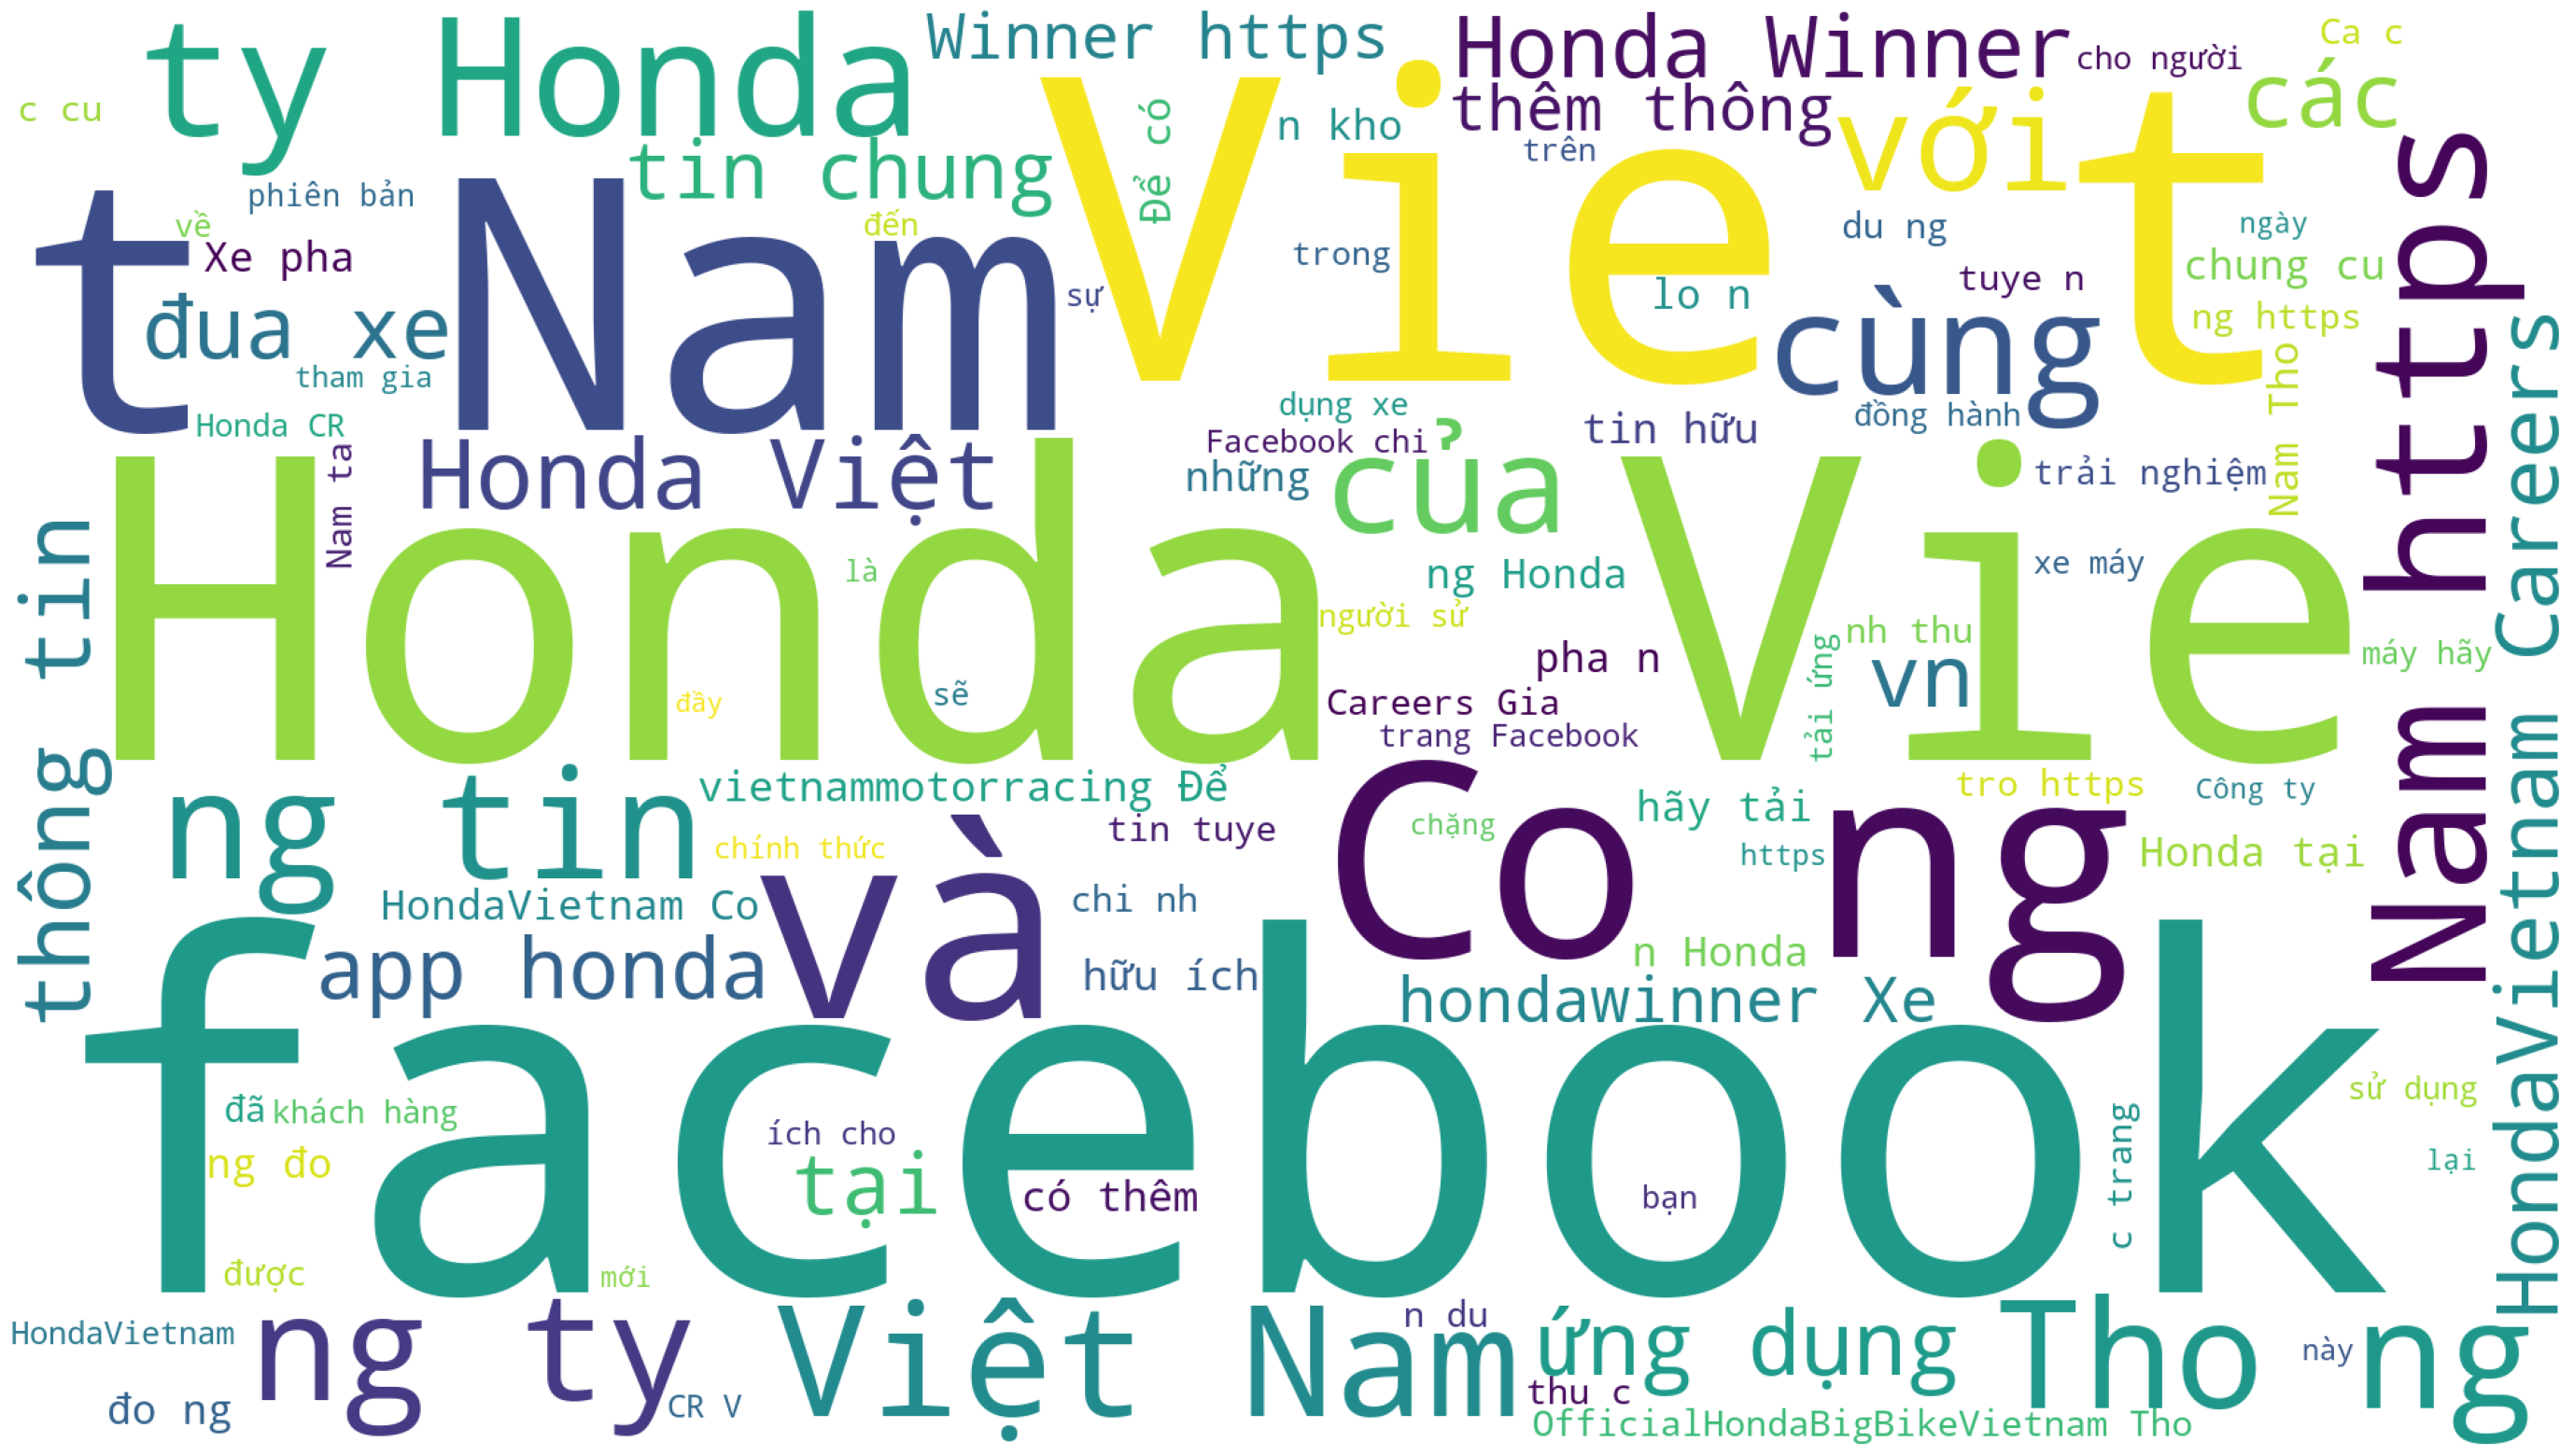

In [8]:
filtered_posts_df = raw_df[raw_df.groupby('date')['post_text'].transform('count') >= average_posts_per_day]
filtered_posts_df['post_text']
text = "" 
for i in filtered_posts_df['post_text']:
  text=text+i+"\n" 

texto = text

wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white', 
                      max_words=100,
                      width=1920, height=1080
                         ).generate(texto)
plt.figure(figsize=(40,20))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### PHÂN TÍCH VỀ SỐ LƯỢT REACTIONS

Biểu đồ Số lượt comment và reaction

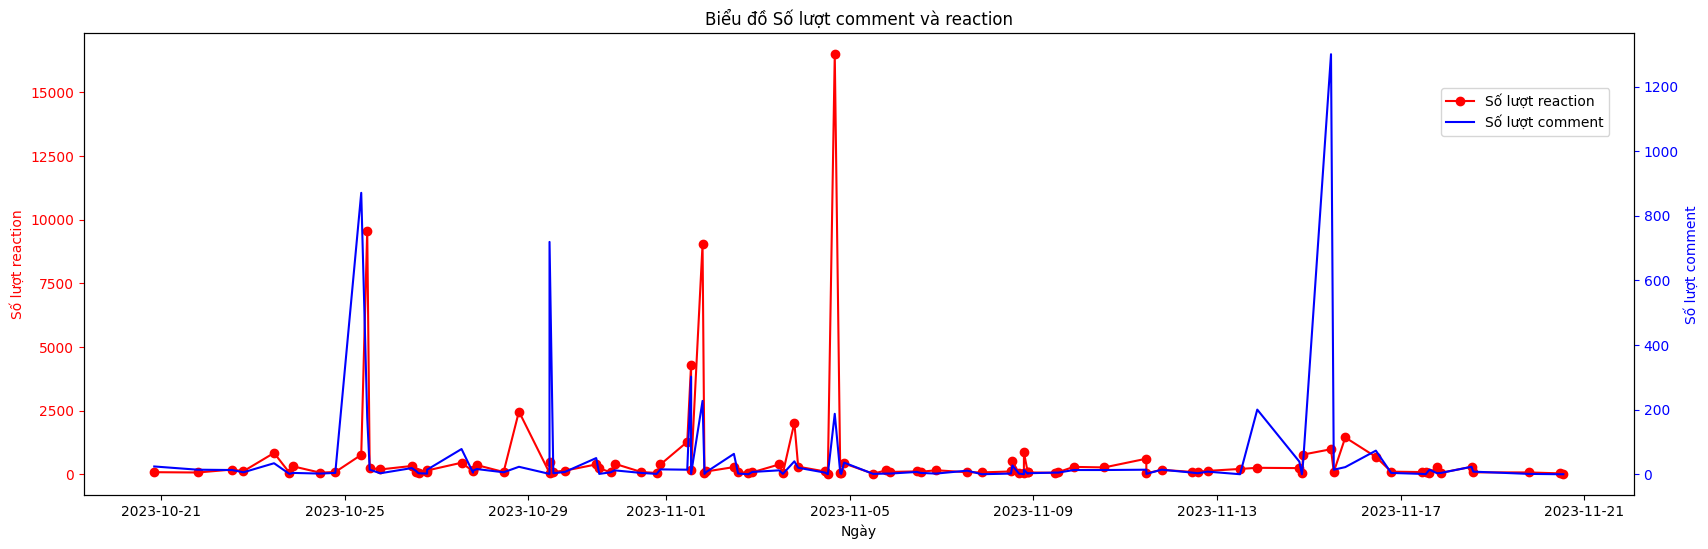

In [9]:
fig, ax1 = plt.subplots(figsize=(20, 6))

ax1.plot(raw_df['time'], raw_df['reaction_count'], marker='o', color='red', label='Số lượt reaction')
ax1.set_xlabel('Ngày')
ax1.set_ylabel('Số lượt reaction', color='red')
ax1.tick_params('y', colors='red')

ax2 = ax1.twinx()
ax2.plot(raw_df['time'], raw_df['comments'], color='blue', alpha=1, label='Số lượt comment')
ax2.set_ylabel('Số lượt comment', color='blue')
ax2.tick_params('y', colors='blue')

plt.title('Biểu đồ Số lượt comment và reaction')

fig.legend(loc='upper left', bbox_to_anchor=(0.8, 0.8))

plt.show()

Ngày nào trong tuần bài đăng sẽ có lượt tương tác nhiều nhất

C:\Users\khanh\AppData\Local\Temp\ipykernel_11460\3497301256.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.pointplot(x='week_day', y='reaction_count', data=raw_df, palette='rainbow')


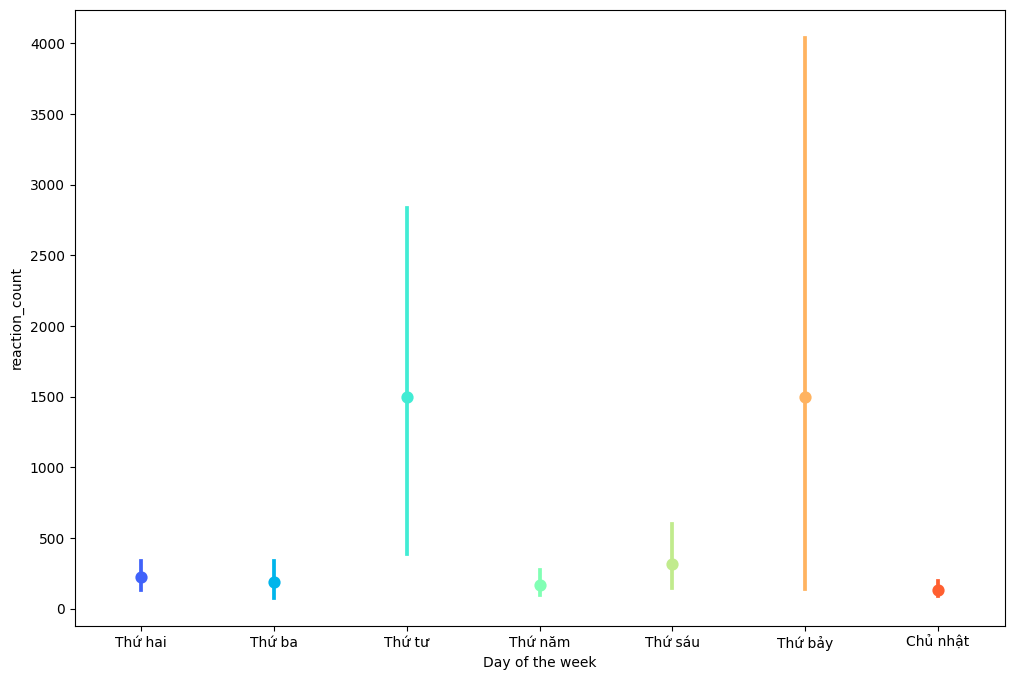

In [10]:
# Convert week_day to categorical variable with correct order of categories
week_day_order = ['Thứ hai', 'Thứ ba', 'Thứ tư', 'Thứ năm', 'Thứ sáu', 'Thứ bảy', 'Chủ nhật']
raw_df['week_day'] = pd.Categorical(raw_df['week_day'], categories=week_day_order, ordered=True)

# Create plot
plt.figure(figsize=(12, 8))
sns.pointplot(x='week_day', y='reaction_count', data=raw_df, palette='rainbow')

# Set x-axis label
plt.xlabel('Day of the week')

# Show plot
plt.show()

Sự liên quan về các reaction

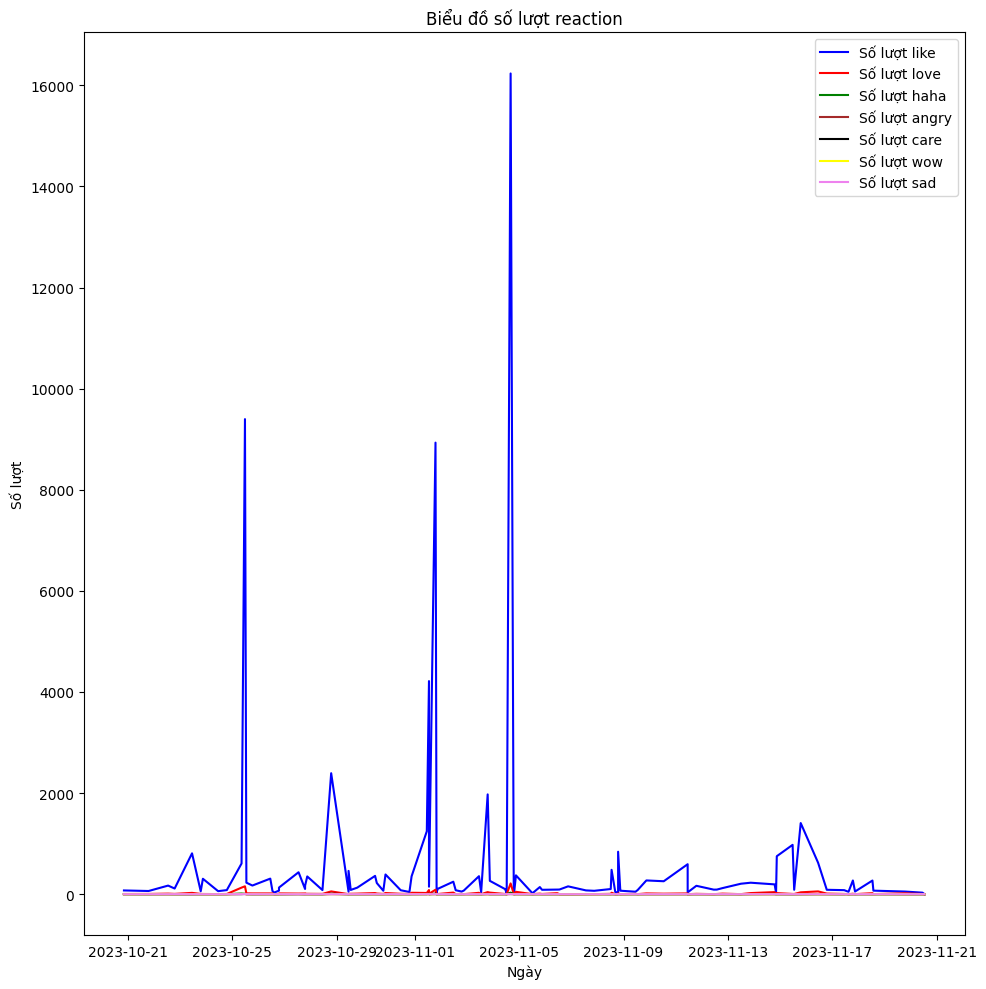

In [11]:
raw_df['reactions'] = raw_df['reactions'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

raw_df['Like'] = raw_df['reactions'].apply(lambda x: x.get('like', 0))
raw_df['Love'] = raw_df['reactions'].apply(lambda x: x.get('love', 0))
raw_df['Haha'] = raw_df['reactions'].apply(lambda x: x.get('haha', 0))
raw_df['Angry'] = raw_df['reactions'].apply(lambda x: x.get('angry', 0))
raw_df['Care'] = raw_df['reactions'].apply(lambda x: x.get('care', 0))
raw_df['Wow'] = raw_df['reactions'].apply(lambda x: x.get('wow', 0))
raw_df['Sad'] = raw_df['reactions'].apply(lambda x: x.get('sad', 0))

plt.figure(figsize=(10, 10))

plt.plot(raw_df['time'], raw_df['Like'], color='blue', label='Số lượt like')
plt.plot(raw_df['time'], raw_df['Love'], color='red', label='Số lượt love')
plt.plot(raw_df['time'], raw_df['Haha'], color='green', label='Số lượt haha')
plt.plot(raw_df['time'], raw_df['Angry'], color='brown', label='Số lượt angry')
plt.plot(raw_df['time'], raw_df['Care'], color='black', label='Số lượt care')
plt.plot(raw_df['time'], raw_df['Wow'], color='yellow', label='Số lượt wow')
plt.plot(raw_df['time'], raw_df['Sad'], color='violet', label='Số lượt sad')


plt.xlabel('Ngày')
plt.ylabel('Số lượt')
plt.title('Biểu đồ số lượt reaction')
plt.legend()
plt.tight_layout()

plt.show()

Cắt bớt các post có like trên 200

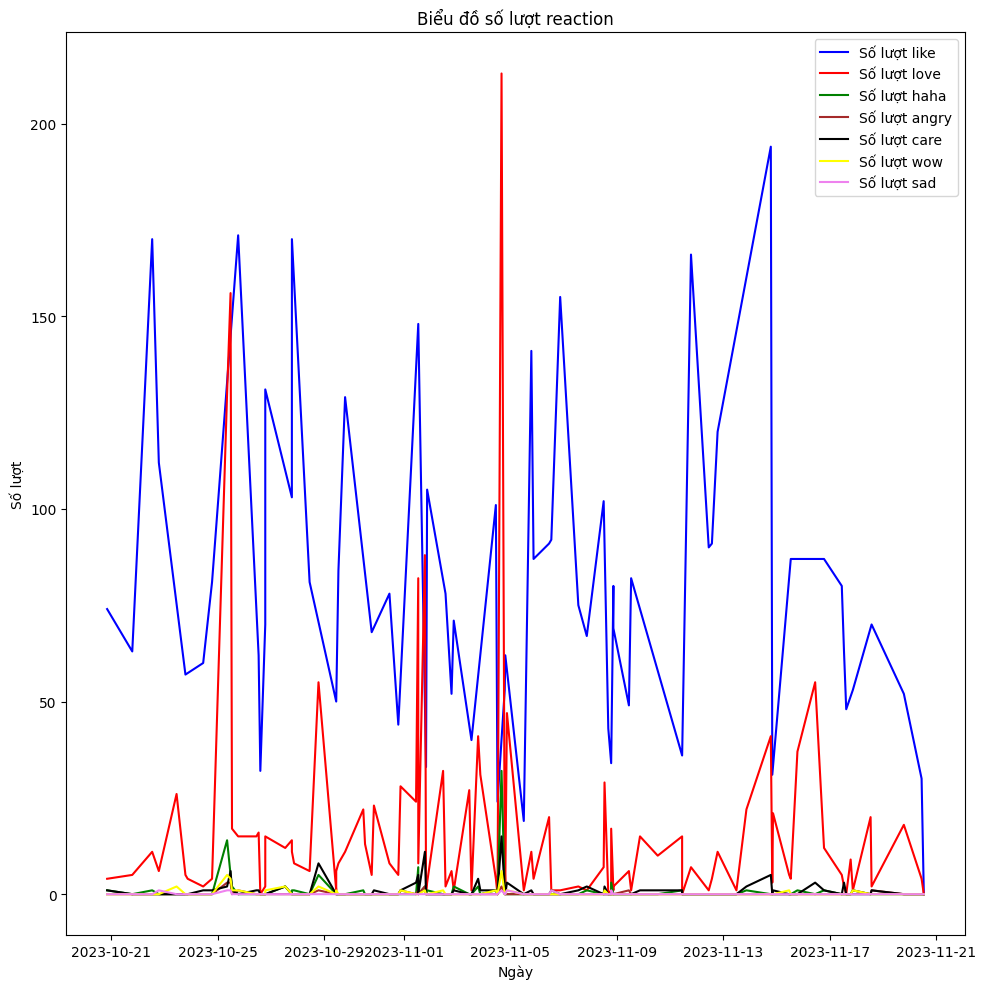

In [12]:
filtered_df = raw_df.loc[raw_df['Like'] <= 200]

plt.figure(figsize=(10, 10))

plt.plot(filtered_df['time'], filtered_df['Like'], color='blue', label='Số lượt like')
plt.plot(raw_df['time'], raw_df['Love'], color='red', label='Số lượt love')
plt.plot(raw_df['time'], raw_df['Haha'], color='green', label='Số lượt haha')
plt.plot(raw_df['time'], raw_df['Angry'], color='brown', label='Số lượt angry')
plt.plot(raw_df['time'], raw_df['Care'], color='black', label='Số lượt care')
plt.plot(raw_df['time'], raw_df['Wow'], color='yellow', label='Số lượt wow')
plt.plot(raw_df['time'], raw_df['Sad'], color='violet', label='Số lượt sad')

plt.xlabel('Ngày')
plt.ylabel('Số lượt')
plt.title('Biểu đồ số lượt reaction')
plt.legend()
plt.tight_layout()

plt.show()

Tỉ lệ giữa các loại reactions

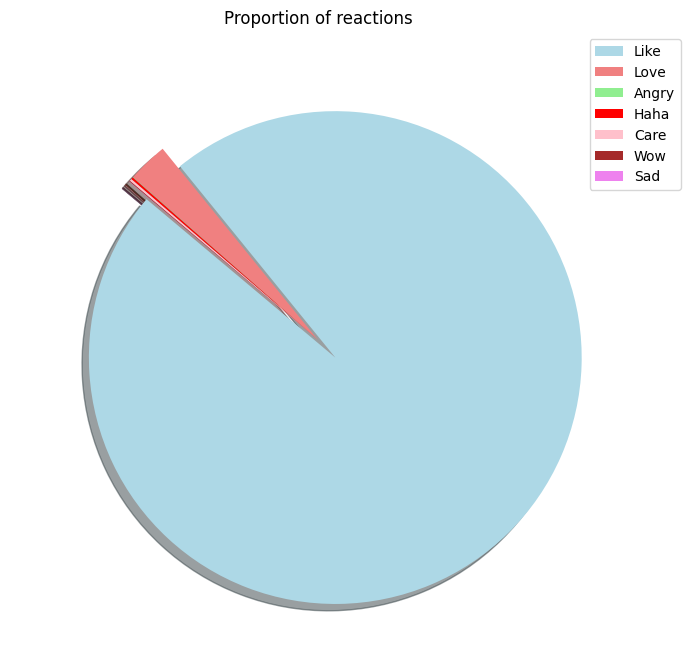

In [13]:
total_like = raw_df['Like'].sum()
total_love = raw_df['Love'].sum()
total_angry = raw_df['Angry'].sum()
total_haha = raw_df['Haha'].sum()
total_care = raw_df['Care'].sum()
total_wow = raw_df['Wow'].sum()
total_sad = raw_df['Sad'].sum()

labels = ['Like', 'Love', 'Angry', 'Haha', 'Care', 'Wow', 'Sad']
sizes = [total_like, total_love, total_angry, total_haha, total_care, total_wow, total_sad]
colors = ['lightblue', 'lightcoral', 'lightgreen', 'red', 'pink', 'brown', 'violet']
explode = (0.1, 0, 0, 0, 0, 0, 0) 

plt.figure(figsize=(8, 8))
plt.pie(sizes, colors=colors, explode=explode, shadow=True, startangle=140)
plt.title('Proportion of reactions')
plt.legend(labels, loc='upper right', bbox_to_anchor=(1.1, 1))
plt.show()


In [14]:
max_like_index = raw_df['reaction_count'].idxmax()

max_like_post = raw_df.loc[max_like_index]
print("Bài viết có số lượt like nhiều nhất:")
print(max_like_post['text'])

Bài viết có số lượt like nhiều nhất:
VARIO 125 – CHẤT NGÔNG THÀNH THỊ
✨Vario 125 hoàn toàn mới – mẫu xe tay ga thể thao siêu ngầu vừa chính thức được ra mắt.

✨Tự tin là biểu tượng cho “chất ngông” đầy mạnh mẽ, tràn năng lượng và thời thượng của giới trẻ, Vario 125 phiên bản 2024 sẽ là chiếc xe tay ga nổi bật mang phong cách thể thao, vừa là bạn đồng hành, vừa là phụ kiện độc đáo, đẳng cấp.

✨Trải nghiệm hoàn hảo từ trang bị tiện lợi, ưu việt:
✅ Sàn để chân phẳng rộng rãi
✅ Cổng sạc USB tiện lợi
✅ Hộc đựng đồ dung tích lớn lên đến 18 lít
✅ Hệ thống khóa thông minh Smart key hiện đại

✨ An tâm sở hữu xe chính hãng với 6 đặc quyền của dịch vụ chăm sóc và chính sách hậu mãi chu đáo:
✅ Bảo hành 3 năm hoặc 30,000km cùng chế độ kiểm tra định kỳ 6 lần miễn phí
✅ Chất lượng xe đạt tiêu chuẩn Honda toàn cầu, đạt chuẩn theo quy chuẩn chất lượng Việt Nam
✅ Kỹ thuật viên có trình độ chuyên môn cao
✅ Tận hưởng nhiều tiện ích trên ứng dụng My Honda+
✅ Nhiều chương trình khuyến mãi, mua xe trả góp và

Các từ khóa phổ biến trong 10 bài đăng có lượt tương tác cao nhất

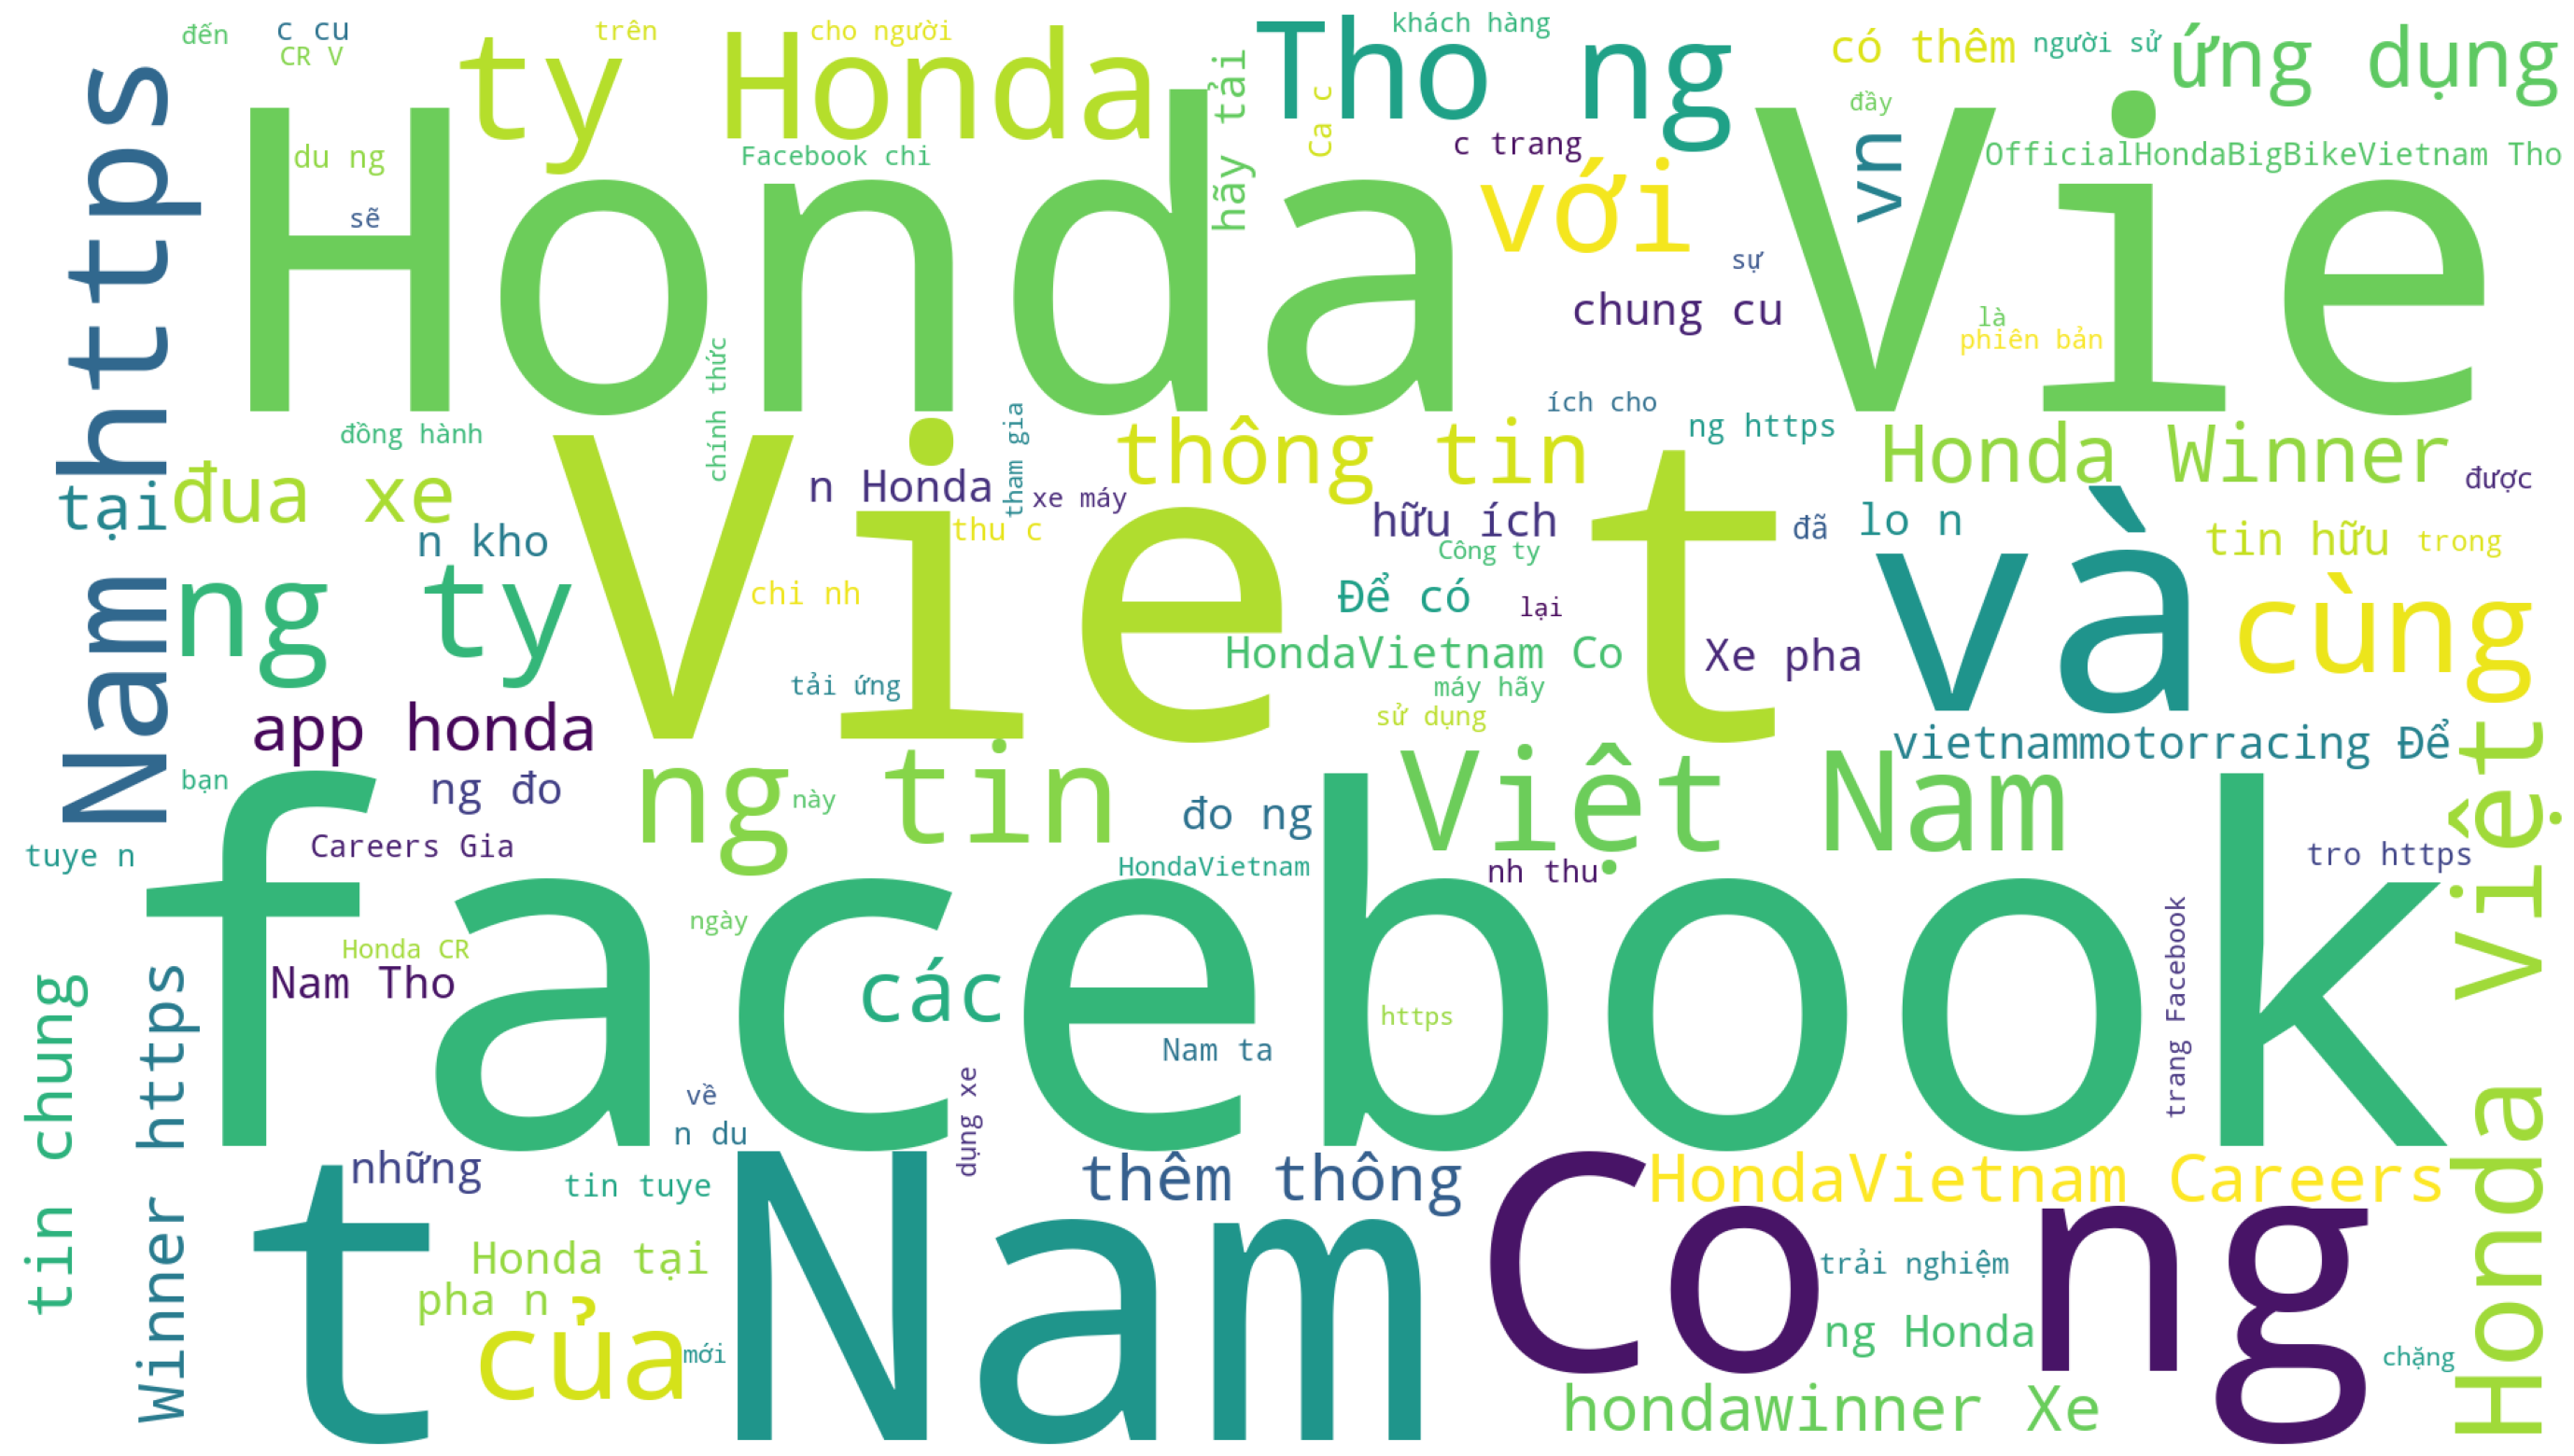

In [15]:
df = raw_df.nlargest(10, 'reaction_count')
df['post_text']
text = "" 
for i in filtered_posts_df['post_text']:
  text=text+i+"\n" 

texto = text

wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white', 
                      max_words=100,
                      width=1920, height=1080
                         ).generate(texto)
plt.figure(figsize=(40,20))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### Phân tích comment

Lấy comment từ file

In [16]:
comment_list = [[],[],[],[]]
comments_full = raw_df['comments_full'].dropna(axis=0)

for post in comments_full:
    for commment_part in post.split(', \''):
        if commment_part.startswith('comment_text\''):
            comment_list[0].append(commment_part[16:-1])
        elif commment_part.startswith('comment_time\''):
            comment_list[1].append(commment_part[24:])
        elif commment_part.startswith('commenter_id\''):
            comment_list[2].append(commment_part[16:-1])
        elif commment_part.startswith('commenter_meta\''):
            comment_list[3].append(commment_part[18:-1])
        else:
            continue

comment_df = pd.DataFrame(comment_list, index=['comment_text', 'comment_time','commenter_id','commenter_meta']).transpose()
comment_df['comment_time'] = comment_df['comment_time'].str.replace('datetime', '').str.replace('(', '').str.replace(')', '')
comment_df['comment_time'] = pd.to_datetime(comment_df['comment_time'], format='%Y, %m, %d, %H, %M')
comment_df

comment_text        comment_time  \
0                                        thật tuyệt vời 2023-11-19 19:00:00   
1     HEAD Dung Vượng 2 - Thị trấn Quốc Oai, Quốc Oa... 2023-11-18 00:00:00   
2                                          Chinh Nguyen 2023-11-19 08:00:00   
3                         Thí sinh số 03 đẹp trai quá 😍 2023-11-18 00:00:00   
4        Nguyễn Xuân Trúc trai Trung Thạch đẹp xuất sắc 2023-11-18 00:00:00   
...                                                 ...                 ...   
1056  Nguyễn Hồng Lam Honda Việt Nam cảm ơn sự ủng h... 2023-10-20 00:00:00   
1057  ð\x9f¥³NÃ\x93NG Há»\x94I!! NÃ\x93NG Há»\x94I X... 2023-10-20 00:00:00   
1058                 #HondaVietNam\n#HondaUNITOUR202\n3 2023-10-20 00:00:00   
1059                 #HondaVietnam\n#HondaUNITOUR202\n3 2023-10-20 00:00:00   
1060  HEAD Dung VÆ°á»£ng 2 - Thá»\x8b tráº¥n Quá»\x9... 2023-10-20 00:00:00   

         commenter_id commenter_meta  
0     100087508223870        Top fan  
1     100057375733520             on  
2     100005762469452             on  
3     100003233947684        Top fan  
4     100003261696154             on  
...               ...            ...  
1056  100044245305650         Author  
1057  100044245305650         Author  
1058  100088854393211             on  
1059  100094911404090             on  
1060  100057375733520             on  

[1061 rows x 4 columns]

Biểu đồ về sự liên quan giữa số lượt reaction theo giờ , lượt comment,

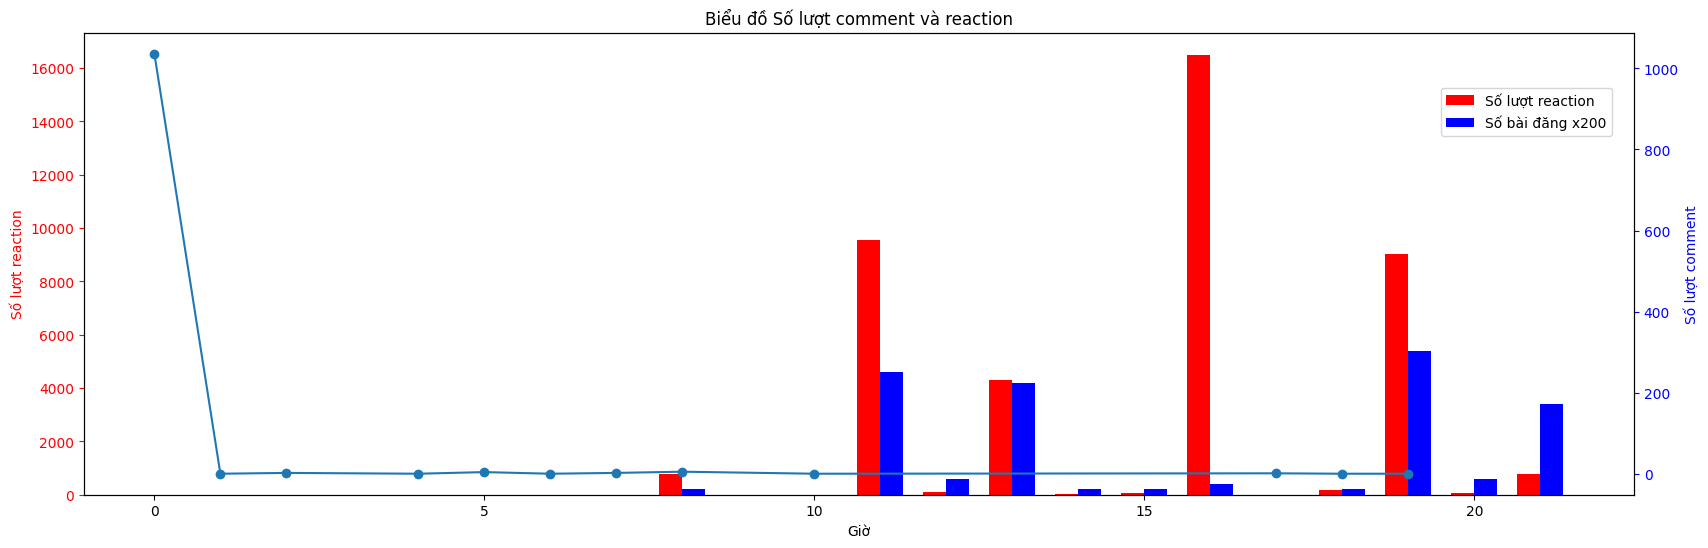

In [22]:
comment_df['hour'] = comment_df['comment_time'].dt.hour
comment_df['hour'] = comment_df['comment_time'].dt.hour

comment_counts_by_hour = comment_df.groupby('hour').size()
raw_df['post_count'] = raw_df.groupby(raw_df['time'].dt.hour)['time'].transform('count')
fig, ax1 = plt.subplots(figsize=(20, 6))
ax1.bar(raw_df['hour'] - 0.175, raw_df['reaction_count'], width=0.35, color='red', label='Số lượt reaction')

ax1.bar(raw_df['hour'] + 0.175, raw_df['post_count'] * 200, width=0.35, color='blue', label='Số bài đăng x200')

ax1.set_xlabel('Giờ')
ax1.set_ylabel('Số lượt reaction', color='red')
ax1.tick_params('y', colors='red')

ax2 = ax1.twinx()
plt.plot(comment_counts_by_hour.index, comment_counts_by_hour.values, marker='o')
ax2.set_ylabel('Số lượt comment', color='blue')
ax2.tick_params('y', colors='blue')

plt.title('Biểu đồ Số lượt comment và reaction')

fig.legend(loc='upper left', bbox_to_anchor=(0.8, 0.8))

plt.show()

Các từ xuất hiện nhiều trong comment

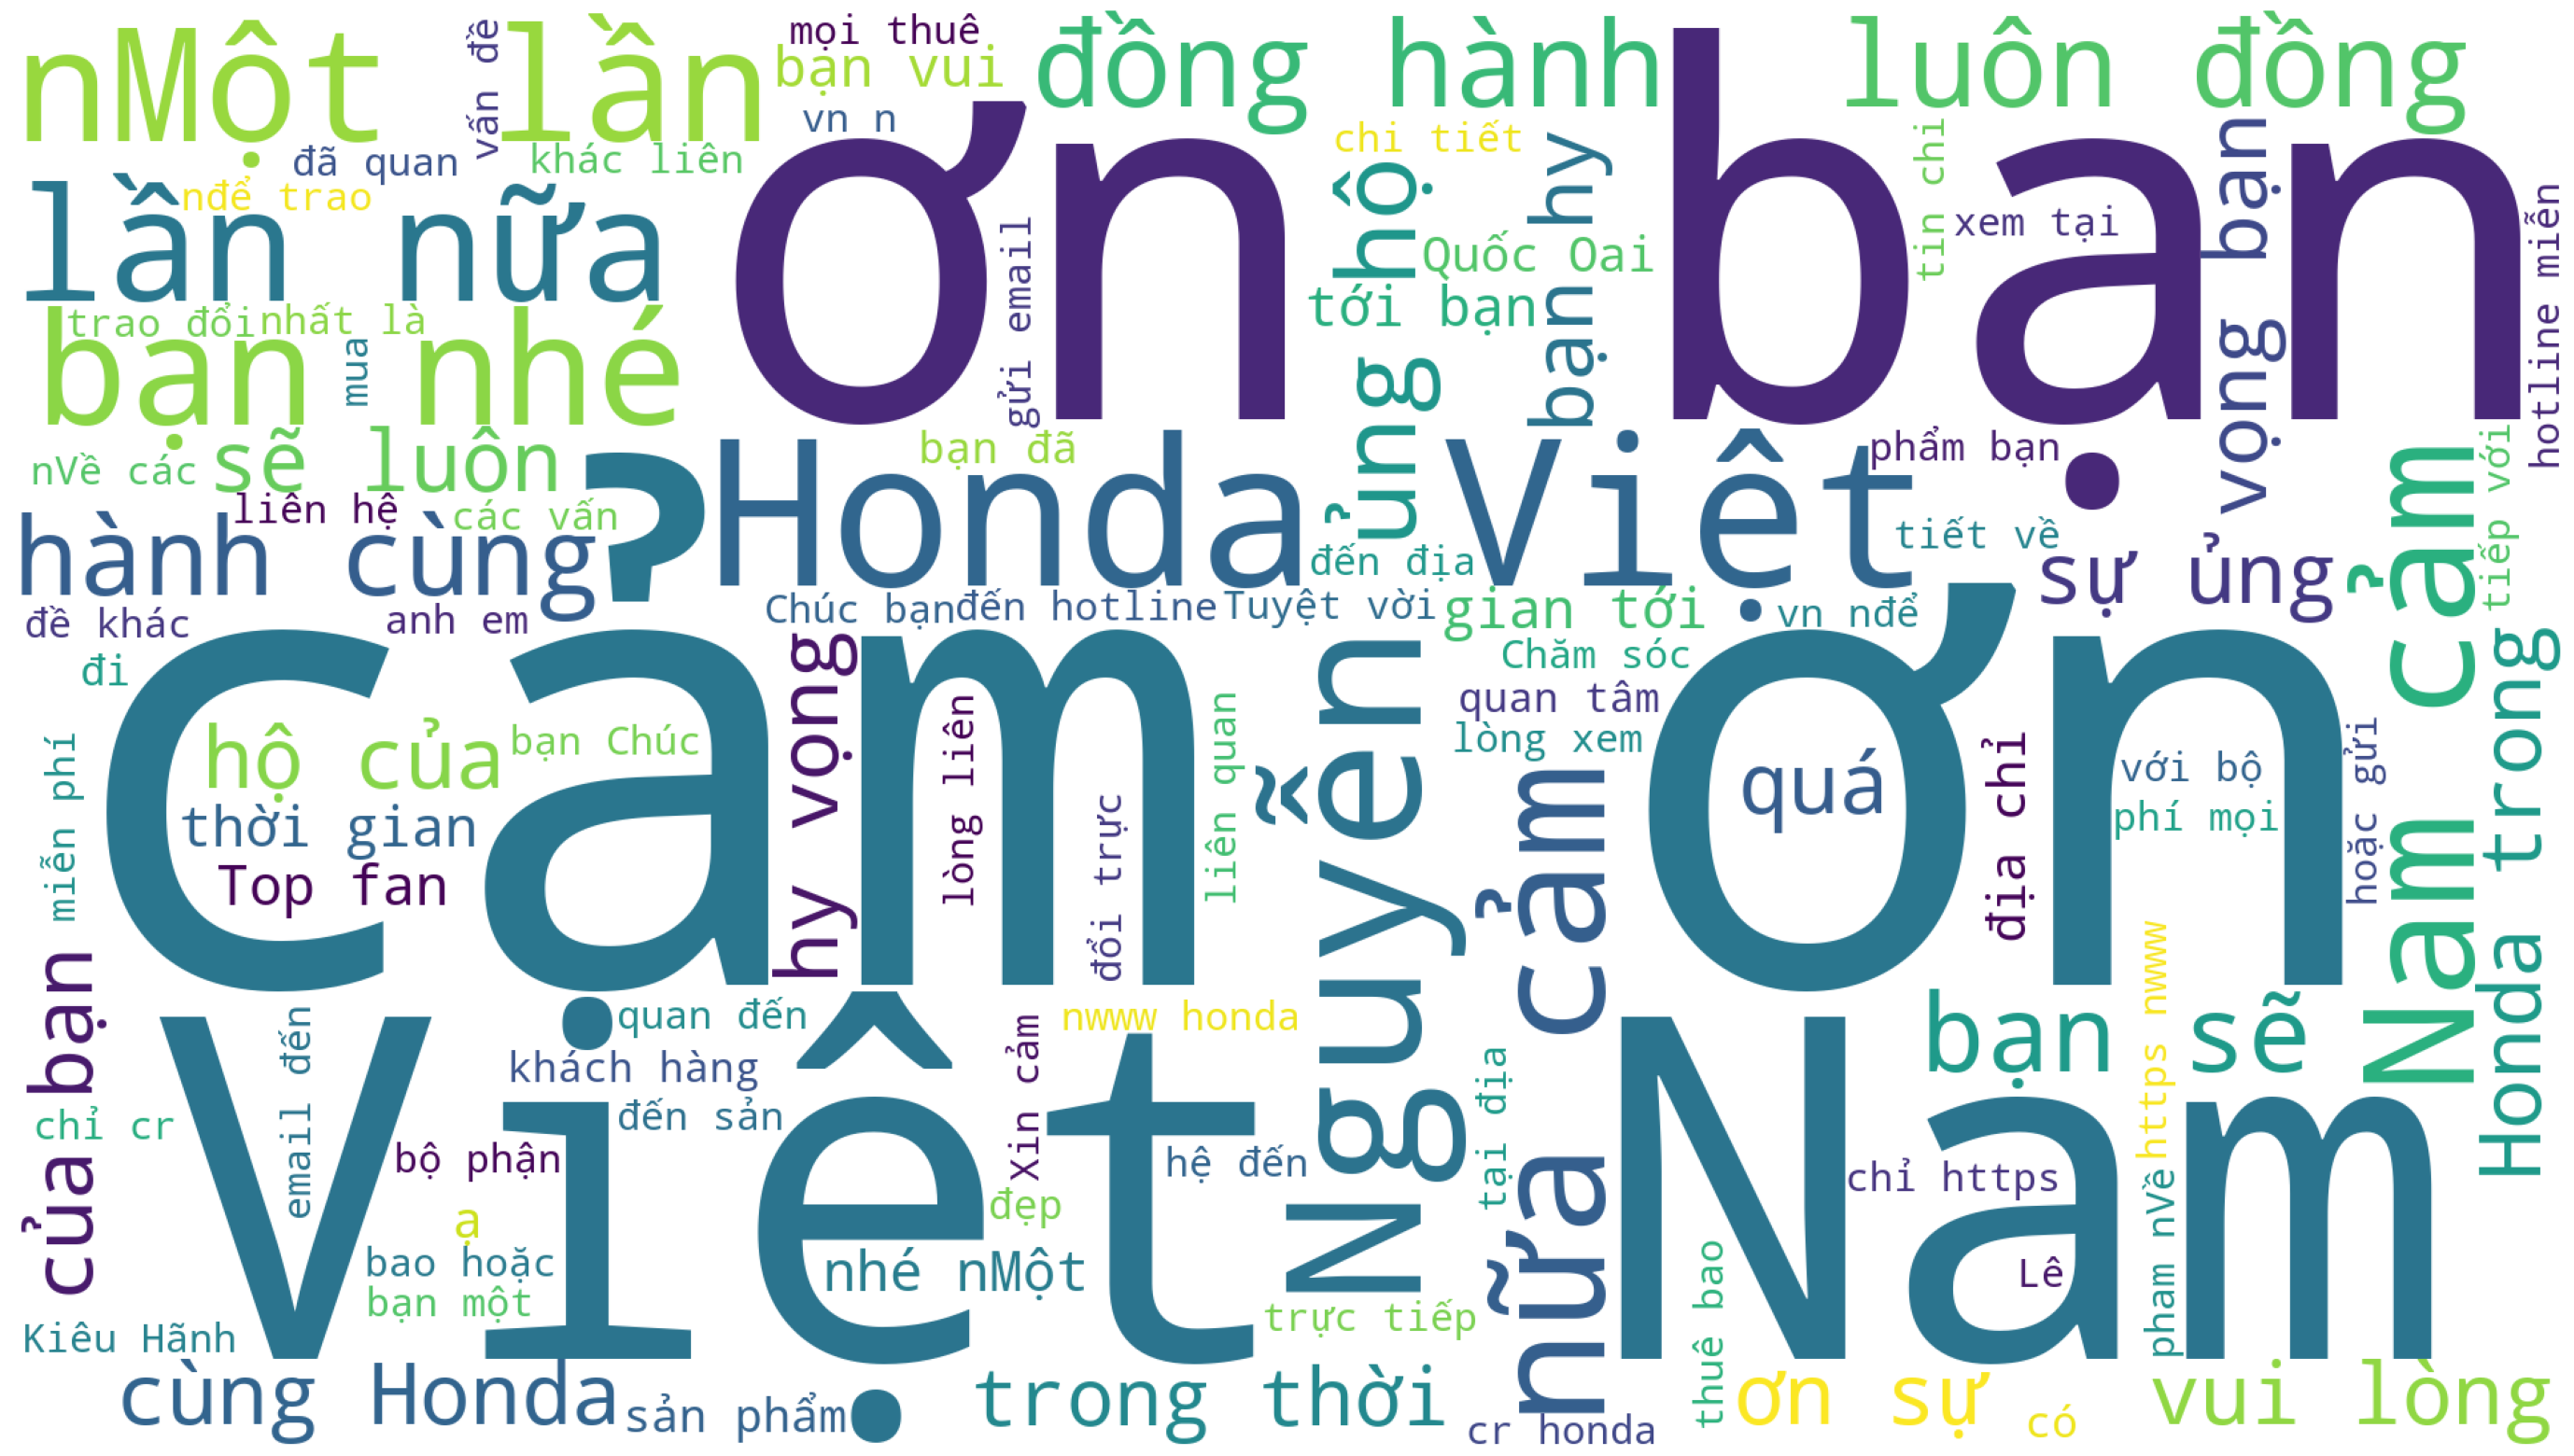

In [26]:
comment_df['comment_text']
text = "" 
for i in comment_df['comment_text']:
  text=text+i+"\n" 

texto = text

wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white', 
                      max_words=100,
                      width=1920, height=1080
                         ).generate(texto)
plt.figure(figsize=(40,20))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()